##**Obtenção das bases de imagens:**
*Baixar as imagens de teste diretamente do github*

*Obs.: Desta forma as imagens ficarão disponíveis somente enquanto esta sessão permanecer ativa ou até que o usuário  clique em no menu: Runtime>Factory reset runtime*

In [ ]:
!git clone https://github.com/guimota-uerj/TestImages.git
!pwd
!ls

Cloning into 'TestImages'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 104 (delta 22), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (104/104), 19.32 MiB | 10.95 MiB/s, done.
Resolving deltas: 100% (22/22), done.
/content/TestImages/HRTEM
Au.tif	F.tiff	TestImages


*Entrar na pasta da imagem de teste utilizada*

In [ ]:
%cd /content/TestImages/HRTEM/
!ls

/content/TestImages/HRTEM
Au.tif	F.tiff	TestImages


# **Questão:**

\

A imagem de teste Au.tif é uma imagem de microscopia eletrônica de transmissão de alta resolução. Na parte escura, próximo ao centro da imagem, podem ser observados diferentes orientações cristalográficas, cada uma contribuindo com diferentes componentes no domínio da frequência. A partir de uma análise de Fourier e filtragem no domínio da frequência usando filtros Gaussianos, separe tais orientações cristalográficas no maior número de grupos que você for capaz.

O primeiro grupo já está segmentado aparecendo na cor azul na figura 'Enhanced'.

\

Explique e analise os resultados obtidos.

\

Note que o filtro presente no programa original é um filtro ideal



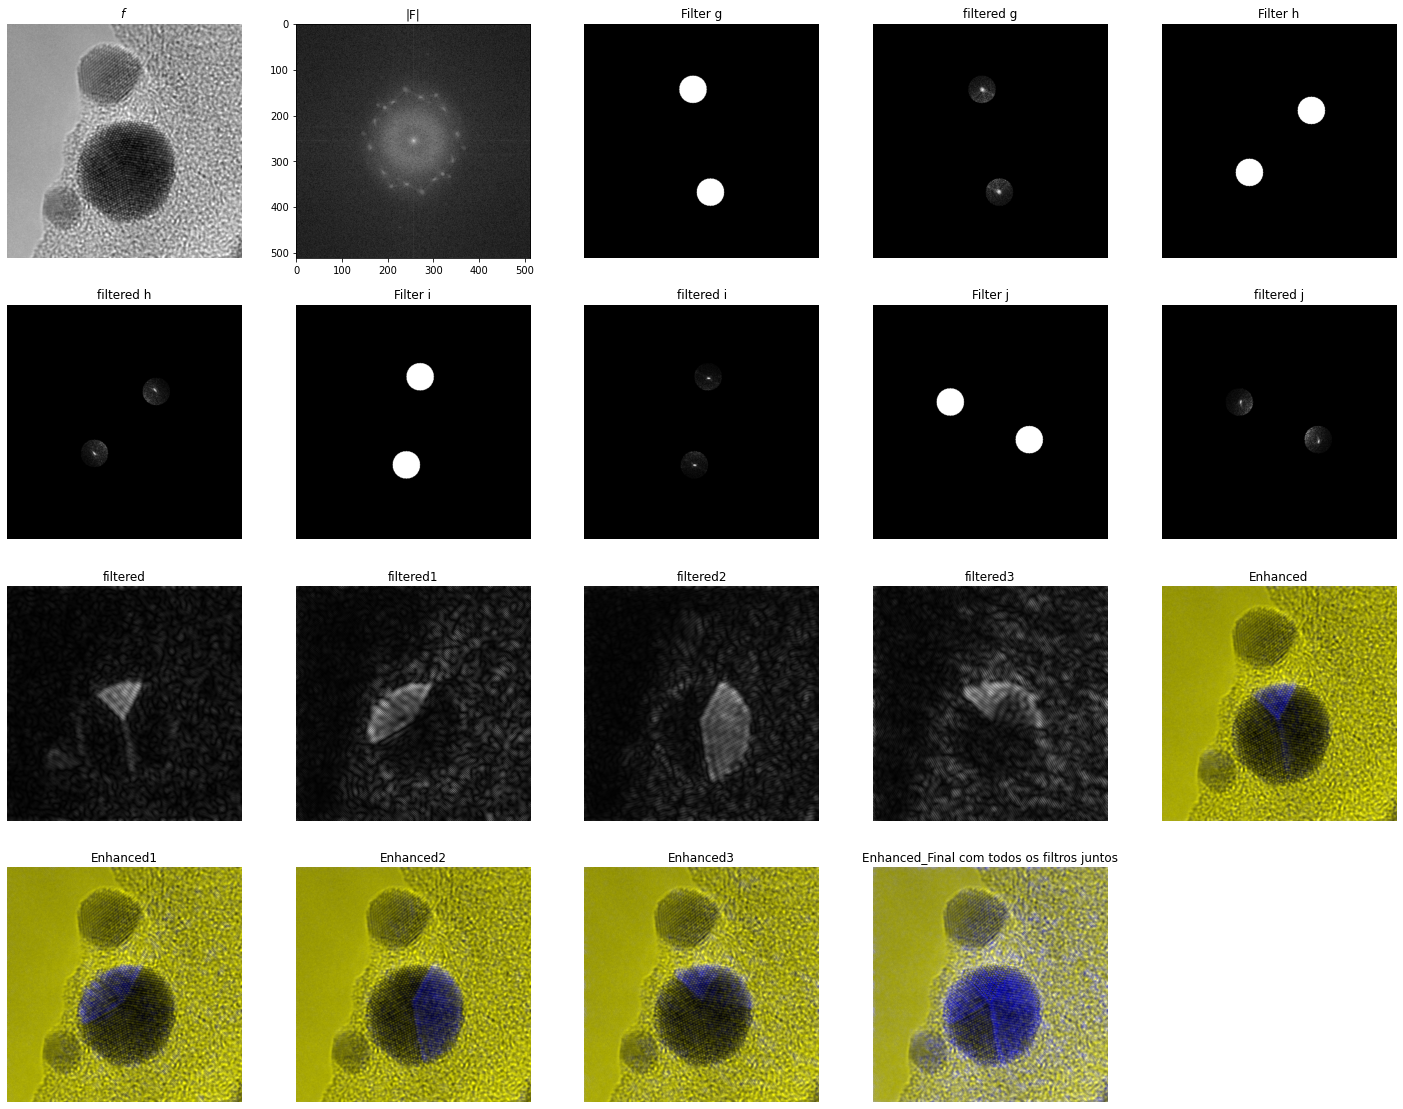

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def ImageFilter(fft_img,mask):
    fshift = fft_img*mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
    return fshift,img_back


f = cv2.imread('Au.tif',0)
plt.figure(figsize = (25,25))

plt.subplot(5,5,1)
plt.title('$f$')
plt.axis('off')
plt.imshow(f,cmap = 'gray')

dft_f = cv2.dft(np.float32(f),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_f_shift = np.fft.fftshift(dft_f)
magnitude = np.sqrt(dft_f_shift[:,:,0]**2+dft_f_shift[:,:,1]**2)

plt.subplot(5,5,2)
plt.title('|F|')
plt.axis('on')
plt.imshow(255*np.log(magnitude/255+1), cmap = 'gray')

# filtro g
g = (np.float32(([[[ 900>=(x - 144)**2 + (y - 237)**2 for z in range(1,3)]\
                      for y in range(0,512)] for x in range(0,512)]))) +\
    (np.float32(([[[ 900>=(x - 368)**2 + (y - 275)**2 for z in range(1,3)]\
                      for y in range(0,512)] for x in range(0,512)])))
#filtro h
h = (np.float32(([[[ 900>=(x - 325)**2 + (y - 190)**2 for z in range(1,3)]\
                      for y in range(0,512)] for x in range(0,512)]))) +\
    (np.float32(([[[ 900>=(x - 190)**2 + (y - 325)**2 for z in range(1,3)]\
                      for y in range(0,512)] for x in range(0,512)])))

#filtro i
i = (np.float32(([[[ 900>=(x - 158)**2 + (y - 270)**2 for z in range(1,3)]\
                      for y in range(0,512)] for x in range(0,512)]))) +\
    (np.float32(([[[ 900>=(x - 350)**2 + (y - 240)**2 for z in range(1,3)]\
                      for y in range(0,512)] for x in range(0,512)])))

#filtro j
j = (np.float32(([[[ 900>=(x - 213)**2 + (y - 168)**2 for z in range(1,3)]\
                      for y in range(0,512)] for x in range(0,512)]))) +\
    (np.float32(([[[ 900>=(x - 295)**2 + (y - 340)**2 for z in range(1,3)]\
                      for y in range(0,512)] for x in range(0,512)])))

plt.subplot(5,5,3)
plt.title('Filter g')
plt.axis('off')
plt.imshow(g[:,:,0], cmap = 'gray')

plt.subplot(5,5,4)
plt.title('filtered g')
plt.axis('off')
plt.imshow( magnitude * g[:,:,0], cmap = 'gray')

plt.subplot(5,5,5)
plt.title('Filter h')
plt.axis('off')
plt.imshow(h[:,:,0], cmap = 'gray')

plt.subplot(5,5,6)
plt.title('filtered h')
plt.axis('off')
plt.imshow( magnitude * h[:,:,0], cmap = 'gray')

plt.subplot(5,5,7)
plt.title('Filter i')
plt.axis('off')
plt.imshow(i[:,:,0], cmap = 'gray')

plt.subplot(5,5,8)
plt.title('filtered i')
plt.axis('off')
plt.imshow( magnitude * i[:,:,0], cmap = 'gray')

plt.subplot(5,5,9)
plt.title('Filter j')
plt.axis('off')
plt.imshow(j[:,:,0], cmap = 'gray')

plt.subplot(5,5,10)
plt.title('filtered j')
plt.axis('off')
plt.imshow( magnitude * j[:,:,0], cmap = 'gray')

f_dft_filtered_shift, img_filtered = ImageFilter(dft_f_shift, g)
f_dft_filtered_shift, img_filtered1 = ImageFilter(dft_f_shift, h)
f_dft_filtered_shift, img_filtered2 = ImageFilter(dft_f_shift, i)
f_dft_filtered_shift, img_filtered3 = ImageFilter(dft_f_shift, j)

plt.subplot(5,5,11)
plt.title('filtered')
plt.axis('off')
plt.imshow(img_filtered, cmap = 'gray')
plt.subplot(5,5,12)
plt.title('filtered1')
plt.axis('off')
plt.imshow(img_filtered1, cmap = 'gray')
plt.subplot(5,5,13)
plt.title('filtered2')
plt.axis('off')
plt.imshow(img_filtered2, cmap = 'gray')
plt.subplot(5,5,14)
plt.title('filtered3')
plt.axis('off')
plt.imshow(img_filtered3, cmap = 'gray')

plt.subplot(5,5,15)
plt.title('Enhanced')
plt.axis('off')
img_filtered = np.uint8(255*img_filtered/np.amax(img_filtered))
RGB = np.stack((f,f, img_filtered), axis=2)
plt.imshow(RGB)

plt.subplot(5,5,16)
plt.title('Enhanced1')
plt.axis('off')
img_filtered1 = np.uint8(255*img_filtered1/np.amax(img_filtered1))
RGB1 = np.stack((f,f, img_filtered1), axis=2)
plt.imshow(RGB1)

plt.subplot(5,5,17)
plt.title('Enhanced2')
plt.axis('off')
img_filtered2 = np.uint8(255*img_filtered2/np.amax(img_filtered2))
RGB2 = np.stack((f,f, img_filtered2), axis=2)
plt.imshow(RGB2)

plt.subplot(5,5,18)
plt.title('Enhanced3')
plt.axis('off')
img_filtered3 = np.uint8(255*img_filtered3/np.amax(img_filtered3))
RGB3 = np.stack((f,f, img_filtered3), axis=2)
plt.imshow(RGB3)

plt.subplot(5,5,19)
plt.title('Enhanced_Final com todos os filtros juntos')
plt.axis('off')
RGB4 = np.stack((f,f, img_filtered+img_filtered1+img_filtered2+img_filtered3), axis=2)
plt.imshow(RGB4)

# Questão
A Transformada de Fourier é responsável por lidar com coordenadas espectrais. De forma simplificada podemos entender que ela trabalha com as coordenadas e a intensidade de cada pixel da imagem de entrada, obtendo a amplitude e a fase da componente relativa de frequência. Sua fórmula, no geral é vista a seguir:

$$\mathcal{F}(f(x, y))=F(u,v)$$

onde:

$f(x, y)$ sé a intensidade do pixel e $x$ e $y$ são as coordenadas do mesmo na imagem de entrada;

$F(u,v)$ função que gera a amplitude e a fase desta componente relativa a frequência $(u,v)$;

$u$ é a frequência no sentido vertical e $v$ a frequência no sentido horizontal.

Existem quatro versões da Transformada de Fourier: contínua infinita, contínua finita, discreta infinita e discreta finita, sendo essa última a versão de nosso interesse.

Na transformada discreta aparece um fator de normalização $M$ e $N$ em transformadas bidimensionais ($N$ para unidimensionais), e temos também que uma Transformada de Fourier de uma função é sempre simétrica. Isso significa que sua base de matriz $g$ pode ser separada, de forma a tratarmos com duas transformadas unidimensionais. De forma generalizada temos:

$$T(u,v)= \sum_{x=0}^{M-1}\sum_{y=0}^{N-1}f(x,y)g(x,y,u,v)$$
onde $f(x,y)$ é a função de entrada e:

$$g(x,y,u,v)=g_1(x,u)g_2(y,v)=g_1(x,u)g_1(y,v)=g_2(x,u)g_2(y,v)=g_2(x,u)g_2(y,v)$$

Para ser obtido uma boa análise visual, trabalha-se com a formulação do espectro $|F|$, pois ela observa a energia dos pixels de uma imagem despresando a fase. Porém, para termos uma melhor leitura dessas energias usamos a escala logarítima (apresentada abaixo), o que permite visualizar componentes relevantes que não são tão facilmente vistos, como quando usando simplesmente $|F(u,v)|$. Em geral, quando visualizamos a transformada, nós transladamos a frequência (0,0) para o centro e é exatamente isso o que está sendo demonstrado na segunda figura deste exercício. Outra característica é de que, devido a simetria de $g$, temos visualmente no espectro pontos de energia e padrões de ruídos (com direções distintas) simétricos. A função da escala logaritmica segue abaixo:
 $$D(u,v)=c. log[1+[F(u,v)]]$$

Um conceito fundamental para a realização da trasnforma de Fourier é o Teorema das Convoluções. Nele temos que a convolução entre duas funções do domínio original equivale na Transformada de Fourier ao produto da transformada da primeira pela segunda. Porém essa função nem sempre permite a identificação do efeito que causará na imagem original. Uma saída para esse problema é focarmos em $G(u,v)$ que, para cada elemento do mesmo, realizaremos o produto da Transformada de Fourier $F(x,y)$ da imagem original. O que permite entender como $G(u,v)$ impacta em cada componente senoidal da imagem transformada. Assim o Teorema da convolução estabelece uma relação entre filtros, o filtro espacial, que pode ser vista como a função de tranferência do dominio espacil e seu filtro equivalente na frequência (Transformada de Fourier). Como esse efeito ocorre sobre a frequência, somos capazes de dizer se este efeito está atenunado, ampliando, preservando ou mudando a fase da frenquência. O Teorema da Convolução é apresentado a seguir:

 $$f(x,y)* g(x,y)=\mathcal{F^{-1}}(F(u, v)\circ G(u,v))$$

 onde,
$f(x,y)$ é função imagem original;

$g(x,y)$ é o filtro no dominio espacial;

F(u,v)$ é função imagem no domínio de Fourier;

$G(u,v)$ função de transferência no domínio de Fourier.

 Todos os filtros elaborados neste trabalho, linhas 31-52, foram feitos à mão, onde a escolha das coordenadas de seus pontos foi feita com o auxílio de um program externo que informasse os valores de $(x,y)$ dos pixels na imagem original. Este filtros são bidimensionais, e estamos trabalhando com a hipótese de que são também simétricos (se desconsiderarmos erro humano de medição das coordenadas). Estes filtros atenuam todas as altas frequências a partir de uma distância de 30 unidades de seu centro. Eles são expressos nas imagens: *Filter g*, *Filter h*, *Filter i* e *Filter j*, com seus respectivos espectros de frequência expressos nas imagens *filtered g*, *filtered f*, *filtered i* e *filtered j*.

 Sendo assim, a função *ImageFilter()* trabalha com a imagem e a máscara do domínio de Fourier, onde ambos estão com a frequência (0,0) centralizada. Nela ocorre primeiramente a aplicação pixel à pixel do filtro e em seguida o deslocamento do centro para o canto superior esquerdo, para assim calcular a Transformada da inversa de Fourier. Por último, como a transformada gera uma número complexo para cada pixel a função calcula a magnitude de cada número complexo, retornando por fim essa magnitude.

Os filtros $g$, $h$, $i$ e $j$ possuem as frequências de corte e parada identicas, o que causa o efeito de ripples no domínio espacial, visível nas imagens *filtered* , *filtered 1*, *filtered 2* e *filterd 3* respectivamente.

Para uma melhor visualização foram geradas imagens RGB, *Enhanced*, *Enhanced 1*, *Enhanced 2*, e *Enhanced 3* respectivamente, onde temos esses mesmos resultados de ripples que ficam destacados em azul contra a imagem original em tom de amarelo.

A última imagem apresentada mostra como todos esses filtros afetam ao mesmo tempo a imagem original, o que permite a detecção de ruídos fora da área de interesse.


